In [ ]:
import pandas as pd 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek   

In [23]:
pd.options.display.max_columns = 100
df = pd.read_csv("Full_Employee_Data_feature_engineered.csv")
df

,Age,Attrition,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore
0,49,0,1,22.0,5.0,20627.0,3.0,0,4.0,False,True,False,True,False,False,0.954545,0.001067,5.500000,3.666667
1,50,0,1,8.0,3.0,11947.0,2.0,1,4.0,False,True,False,True,False,False,0.944444,0.000670,2.666667,3.333333
2,32,0,1,21.0,5.0,24026.0,3.0,1,4.0,False,True,False,False,True,False,0.857143,0.000874,7.000000,4.000000
3,38,0,1,8.0,3.0,11140.0,1.0,0,4.0,False,False,True,True,False,False,0.947368,0.000718,2.000000,3.666667
4,28,1,2,27.0,1.0,3034.0,8.0,1,1.0,False,False,True,False,False,True,0.000000,0.008899,27.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249630,30,0,1,14.0,4.0,16144.0,3.0,1,4.0,False,True,False,False,False,True,0.700000,0.000867,3.500000,3.666667
249631,40,0,1,8.0,5.0,21604.0,2.0,0,3.0,False,True,False,False,True,False,0.842105,0.000370,2.000000,3.000000
249632,31,0,1,22.0,3.0,11428.0,2.0,0,3.0,False,True,False,False,True,False,0.909091,0.001925,5.500000,4.000000
249633,33,0,1,1.0,1.0,2836.0,8.0,0,2.0,False,True,False,False,False,True,0.000000,0.000353,1.000000,1.000000


## 🔀 Split Data and Apply SMOTE

### 🗃️ taking a sample representing the population

In [24]:
train_dataset, test_dataset = train_test_split(
    df,
    test_size=0.2, 
    stratify=df['Attrition'],
    random_state=42
)

In [ ]:
sample, ignorable_test = train_test_split(
    train_dataset,
    train_size= 0.05, 
    stratify=train_dataset['Attrition'], 
    random_state=42
)

In [26]:
X_s = sample.drop('Attrition', axis=1)
y_s = sample['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42,stratify=y_s)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


smt = SMOTETomek(random_state=42)
x_smote, y_smote = smt.fit_resample(x_train, y_train)

## whole dataset

In [27]:
x_train_full = train_dataset.drop('Attrition', axis=1)
y_train_full = train_dataset['Attrition']

x_test_full = test_dataset.drop('Attrition', axis=1)
y_test_full = test_dataset['Attrition']

scaler = StandardScaler()

scaler.fit(x_train_full)

x_train_full = scaler.transform(x_train_full)
x_test_full = scaler.transform(x_test_full)

s = SMOTETomek(random_state=42)

x_smote_full, y_smote_full = s.fit_resample(x_train_full, y_train_full)

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Baseline model

## 🧠 Train Logistic Regression

Test Accuracy : 0.8775033377837116
Train Accuracy : 0.8822435255401345


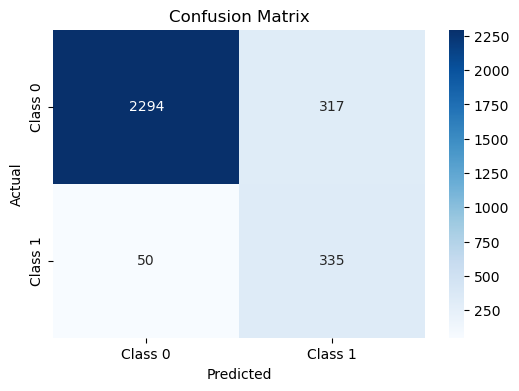


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      2611
           1       0.51      0.87      0.65       385

    accuracy                           0.88      2996
   macro avg       0.75      0.87      0.79      2996
weighted avg       0.92      0.88      0.89      2996



In [ ]:
logReg = LogisticRegression(
    random_state=42
)

logReg.fit(x_smote, y_smote)

y_pred_test = logReg.predict(x_test)
y_pred_train = logReg.predict(x_train)
####################################
dump(logReg, r'C:\Users\Admin\Desktop\Final_Project\ML_FLOW\logReg_model.pkl')
####################################
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 KNN 

Test Accuracy : 0.87283044058745
Train Accuracy : 0.921304907712119


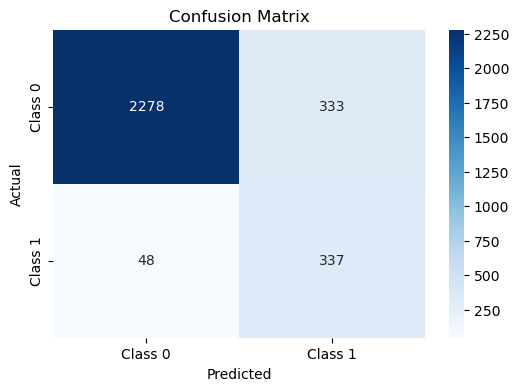


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      2611
           1       0.50      0.88      0.64       385

    accuracy                           0.87      2996
   macro avg       0.74      0.87      0.78      2996
weighted avg       0.92      0.87      0.89      2996



In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=5
) 

knn.fit(x_smote, y_smote) 

y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
################################
dump(knn, r'C:\Users\Admin\Desktop\Final_Project\ML_FLOW\knn_model.pkl')
####################################
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 Train Random Forest

Test Accuracy : 0.931909212283044
Train Accuracy : 0.9988553441121762


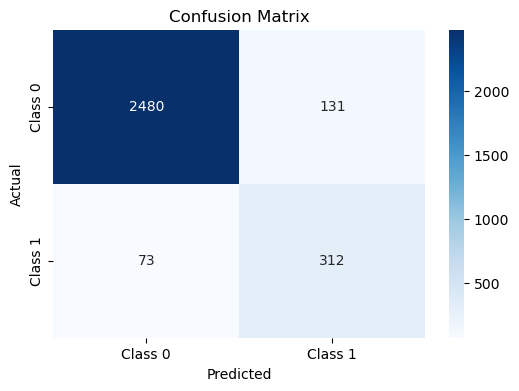


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2611
           1       0.70      0.81      0.75       385

    accuracy                           0.93      2996
   macro avg       0.84      0.88      0.86      2996
weighted avg       0.94      0.93      0.93      2996



In [ ]:
rf = RandomForestClassifier( 
    random_state=42
)

rf.fit(x_smote, y_smote)

y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
####################################
dump(rf, r'C:\Users\Admin\Desktop\Final_Project\ML_FLOW\rf_model.pkl')
####################################
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 Train XGB

Test Accuracy : 0.9362483311081442
Train Accuracy : 0.9988553441121762


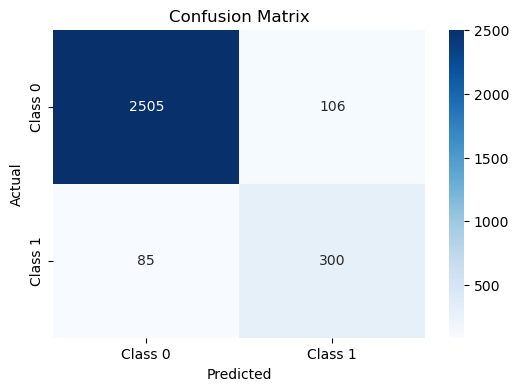


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      2611
           1       0.74      0.78      0.76       385

    accuracy                           0.94      2996
   macro avg       0.85      0.87      0.86      2996
weighted avg       0.94      0.94      0.94      2996



In [ ]:
XGB = XGBClassifier(
    random_state=42
)

XGB.fit(x_smote, y_smote)

y_pred_test = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)
####################################
dump(XGB, r'C:\Users\Admin\Desktop\Final_Project\ML_FLOW\XGB_model.pkl')
####################################
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# choosing model

In [11]:
# Set up lists to store the best models and results for final comparison
best_models = {}
results = {}

# Placeholder variables for models that need to be run in subsequent blocks
best_lr, best_knn, best_rf, best_xgb = None, None, None, None

## 📊 Logistic Regression Accuracy

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver 

Best parameters (Logistic Regression): {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Test Accuracy (Logistic Regression): 0.8768
Test F1-Score (Logistic Regression): 0.6449
Test AUC (Logistic Regression): 0.9463


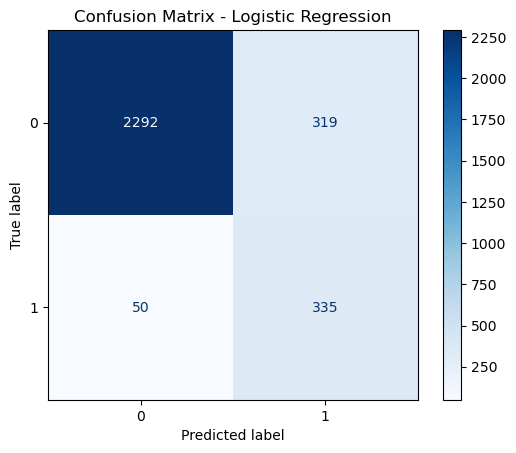

Confusion Matrix saved to 'cm_lr.png'

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      2611
           1       0.51      0.87      0.64       385

    accuracy                           0.88      2996
   macro avg       0.75      0.87      0.79      2996
weighted avg       0.92      0.88      0.89      2996



In [12]:
# --- Logistic Regression Enhanced ---
param_grid_lr = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'], 
    'l1_ratio': [0.1, 0.5, 0.9, None] 
}


grid_lr = GridSearchCV(
    LogisticRegression(random_state=42), 
    param_grid_lr, 
    scoring='roc_auc', # Enhanced metric for imbalance
    cv=5, 
    verbose=0,
    n_jobs=-1
)
grid_lr.fit(x_smote, y_smote)

print("Best parameters (Logistic Regression):", grid_lr.best_params_)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test)
y_proba_lr = best_lr.predict_proba(x_test)[:, 1]

# Evaluate and report
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

results['Logistic Regression'] = {'Accuracy': acc_lr, 'F1-Score': f1_lr, 'AUC': auc_lr}

print(f"\nTest Accuracy (Logistic Regression): {acc_lr:.4f}")
print(f"Test F1-Score (Logistic Regression): {f1_lr:.4f}")
print(f"Test AUC (Logistic Regression): {auc_lr:.4f}")

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr)
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show('cm_lr.png')
plt.close()
print("Confusion Matrix saved to 'cm_lr.png'")
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

## 📊 KNN Accuracy 

Best parameters (KNN): {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}

Test Accuracy (KNN): 0.8808
Test F1-Score (KNN): 0.6544
Test AUC (KNN): 0.9472


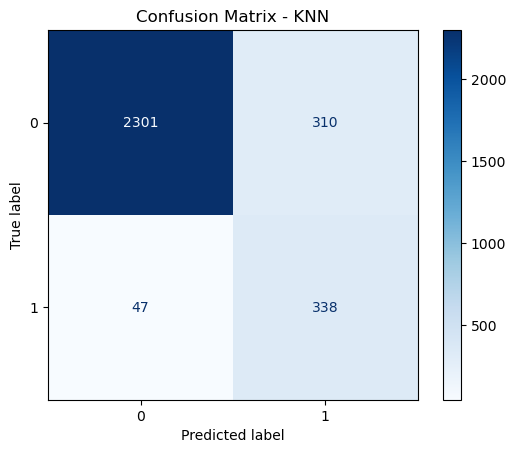

Confusion Matrix saved to 'cm_knn.png'

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      2611
           1       0.52      0.88      0.65       385

    accuracy                           0.88      2996
   macro avg       0.75      0.88      0.79      2996
weighted avg       0.92      0.88      0.89      2996



In [13]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15], 
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}


grid_knn = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid_knn, 
    scoring='roc_auc', 
    cv=5, 
    verbose=0,
    n_jobs=-1
)
grid_knn.fit(x_smote, y_smote)

print("Best parameters (KNN):", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)
y_proba_knn = best_knn.predict_proba(x_test)[:, 1]

# Evaluate and report
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

results['KNN'] = {'Accuracy': acc_knn, 'F1-Score': f1_knn, 'AUC': auc_knn}

print(f"\nTest Accuracy (KNN): {acc_knn:.4f}")
print(f"Test F1-Score (KNN): {f1_knn:.4f}")
print(f"Test AUC (KNN): {auc_knn:.4f}")

# Plot Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(cm_knn)
disp_knn.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show('cm_lr.png')
plt.close()
print("Confusion Matrix saved to 'cm_knn.png'")
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))

## 📊 Random Forest Accuracy

Best parameters (Random Forest): {'max_depth': 21, 'min_samples_split': 3, 'n_estimators': 500}

Test Accuracy (Random Forest): 0.9346
Test F1-Score (Random Forest): 0.7667
Test AUC (Random Forest): 0.9746


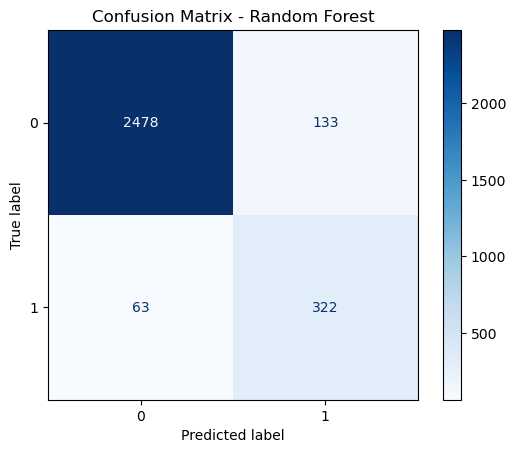

Confusion Matrix saved to 'cm_rf.png'

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      2611
           1       0.71      0.84      0.77       385

    accuracy                           0.93      2996
   macro avg       0.84      0.89      0.86      2996
weighted avg       0.94      0.93      0.94      2996



In [14]:
param_grid_rf = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [11, 17, 21],
    'min_samples_split': [3, 5, 7]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'), 
    param_grid_rf, 
    scoring='roc_auc', 
    cv=5, 
    verbose=0,
    n_jobs=-1
)
grid_rf.fit(x_smote, y_smote)
print("Best parameters (Random Forest):", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
y_proba_rf = best_rf.predict_proba(x_test)[:, 1]

# Evaluate and report
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

results['Random Forest'] = {'Accuracy': acc_rf, 'F1-Score': f1_rf, 'AUC': auc_rf}

print(f"\nTest Accuracy (Random Forest): {acc_rf:.4f}")
print(f"Test F1-Score (Random Forest): {f1_rf:.4f}")
print(f"Test AUC (Random Forest): {auc_rf:.4f}")

# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show('cm_rf.png')
plt.close()
print("Confusion Matrix saved to 'cm_rf.png'")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

## 📊 XGB Accuracy

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:23:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters (XGBoost): {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

Test Accuracy (XGBoost): 0.9403
Test F1-Score (XGBoost): 0.7726
Test AUC (XGBoost): 0.9747


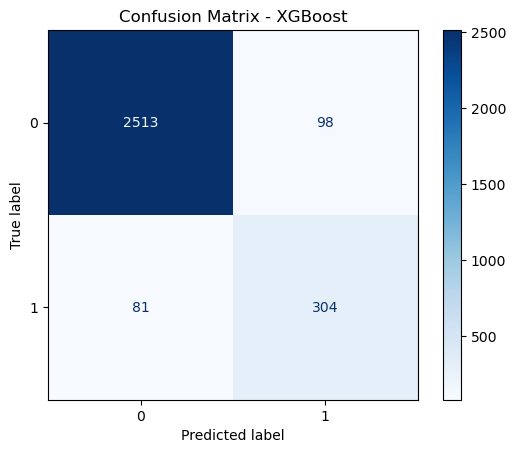

Confusion Matrix saved to 'cm_xgb.png'

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2611
           1       0.76      0.79      0.77       385

    accuracy                           0.94      2996
   macro avg       0.86      0.88      0.87      2996
weighted avg       0.94      0.94      0.94      2996



In [15]:
# --- XGBoost Enhanced ---
param_grid_xgb = {
    'n_estimators': [300 , 400 , 600], 
    'max_depth': [3,  7,], 
    'learning_rate': [0.01, 0.1], 
    'subsample': [0.8, 0.9], 
    'colsample_bytree': [0.8, 0.9] 
}


grid_xgb = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
    param_grid_xgb, 
    scoring='roc_auc', 
    cv=5, 
    verbose=0,
    n_jobs=-1
)
grid_xgb.fit(x_smote, y_smote)
print("Best parameters (XGBoost):", grid_xgb.best_params_)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
y_proba_xgb = best_xgb.predict_proba(x_test)[:, 1]

# Evaluate and report
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

results['XGBoost'] = {'Accuracy': acc_xgb, 'F1-Score': f1_xgb, 'AUC': auc_xgb}

print(f"\nTest Accuracy (XGBoost): {acc_xgb:.4f}")
print(f"Test F1-Score (XGBoost): {f1_xgb:.4f}")
print(f"Test AUC (XGBoost): {auc_xgb:.4f}")

# Plot Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(cm_xgb)
disp_xgb.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show('cm_xgb.png')
plt.close()
print("Confusion Matrix saved to 'cm_xgb.png'")
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


## Selected model

In [16]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [acc_lr, acc_knn, acc_rf, acc_xgb]
roc_accuracies = [auc_lr, auc_knn, auc_rf, auc_xgb]
f1_scores = [f1_lr, f1_knn, f1_rf, f1_xgb]
best_params = [
    grid_lr.best_params_,
    grid_knn.best_params_,
    grid_rf.best_params_,
    grid_xgb.best_params_
]

best_index = np.argmax(roc_accuracies)

print("🏆 Best Model:")
print("Model:", model_names[best_index])
print("Best Parameters:", best_params[best_index])
print(f"Accuracy: {accuracies[best_index]:.4f}")

🏆 Best Model:
Model: XGBoost
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.9403


# tuned model on all dataset

Test Accuracy : 0.9450397580467482
Train Accuracy : 0.9549191820057283


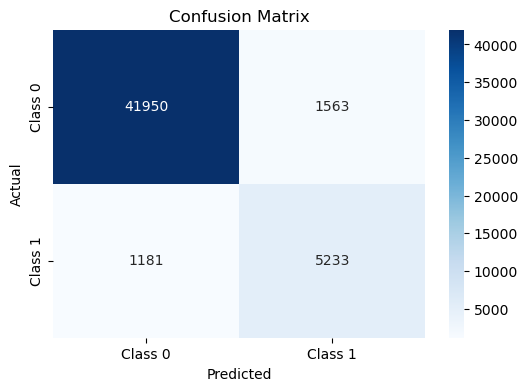


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     43513
           1       0.77      0.82      0.79      6414

    accuracy                           0.95     49927
   macro avg       0.87      0.89      0.88     49927
weighted avg       0.95      0.95      0.95     49927



In [ ]:
XGB = XGBClassifier(
    random_state = 42 ,
    colsample_bytree = 0.9, 
    learning_rate = 0.1, 
    max_depth = 7, 
    n_estimators = 300, 
    subsample = 0.9
    
)

XGB.fit(x_smote_full, y_smote_full)

y_pred_test = XGB.predict(x_test_full)
y_pred_train = XGB.predict(x_train_full)

dump(XGB, r'C:\Users\Admin\Desktop\Final_Project\model\XGB_model_final.pkl')
####################################
print(f'Test Accuracy : {accuracy_score(y_test_full , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train_full , y_pred_train)}')

cm = confusion_matrix(y_test_full, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test_full, y_pred_test))